# Script to convert DiMESTV TIFF to videos 

In [1]:
import os
import read

# list of files ending in .tif in 'munaretto/2022-11-21_Bortolon'
files = os.listdir('munaretto/2022-11-21_Bortolon')
processed = os.listdir('/home/maana/mp_2022_34_53/dimes')
processed = [file.split('.')[0] for file in processed]
for file in files:
    if file.endswith('.tif'):
        
        shot = file.split('_')[0]
        if shot in processed:
            print(f'now reading {file} - skip video already processed')
        else:
            print(f'now reading {file}')
            read.dimes_movie(f'munaretto/2022-11-21_Bortolon/{file}')


now reading 192963_CII_1x1_1ms_low.tif
now reading 192964_CII_1x1_1ms_low.tif
now reading 192960_DaplhaND_1x1_5ms_low.tif
now reading 192970_CII_1x1_1ms_low.tif
now reading 192969_CII_1x1_1ms_low.tif
now reading 192974_CII_1x1_1ms_low.tif
now reading 192973_CII_1x1_1ms_low.tif
now reading fiducial.tif
now reading 192967_CII_1x1_1ms_low.tif
now reading 192965_CII_1x1_1ms_low.tif
now reading 192962_CII_1x1_1ms_low.tif
now reading 192961_CII_1x1_4ms_low.tif
now reading 192966_CII_1x1_1ms_low.tif
now reading 192972_CII_1x1_1ms_low.tif
now reading 192968_CII_1x1_1ms_low.tif


# Show diagnostics view on the image from A. McLean     

** DiMES HEAD Posittion in the image - [0.7425000000000002, -1.2860477246198914] [x m,y m]

** DiMES TV FOV defined by these four points in the image - ([1.2513126515529454, -1.452450897466661], [0.6168952474546125, -1.846820304666919], [0.2902879884328313, -1.3024508591372181], [0.9247053925311641, -0.9080814519369601]) [x m,y m]

** Fastcam FOV in the image - (-0.72, -50) [R m,phi deg]

[109.8989898989899, 480.0] [19.393939393939394, 0.0]


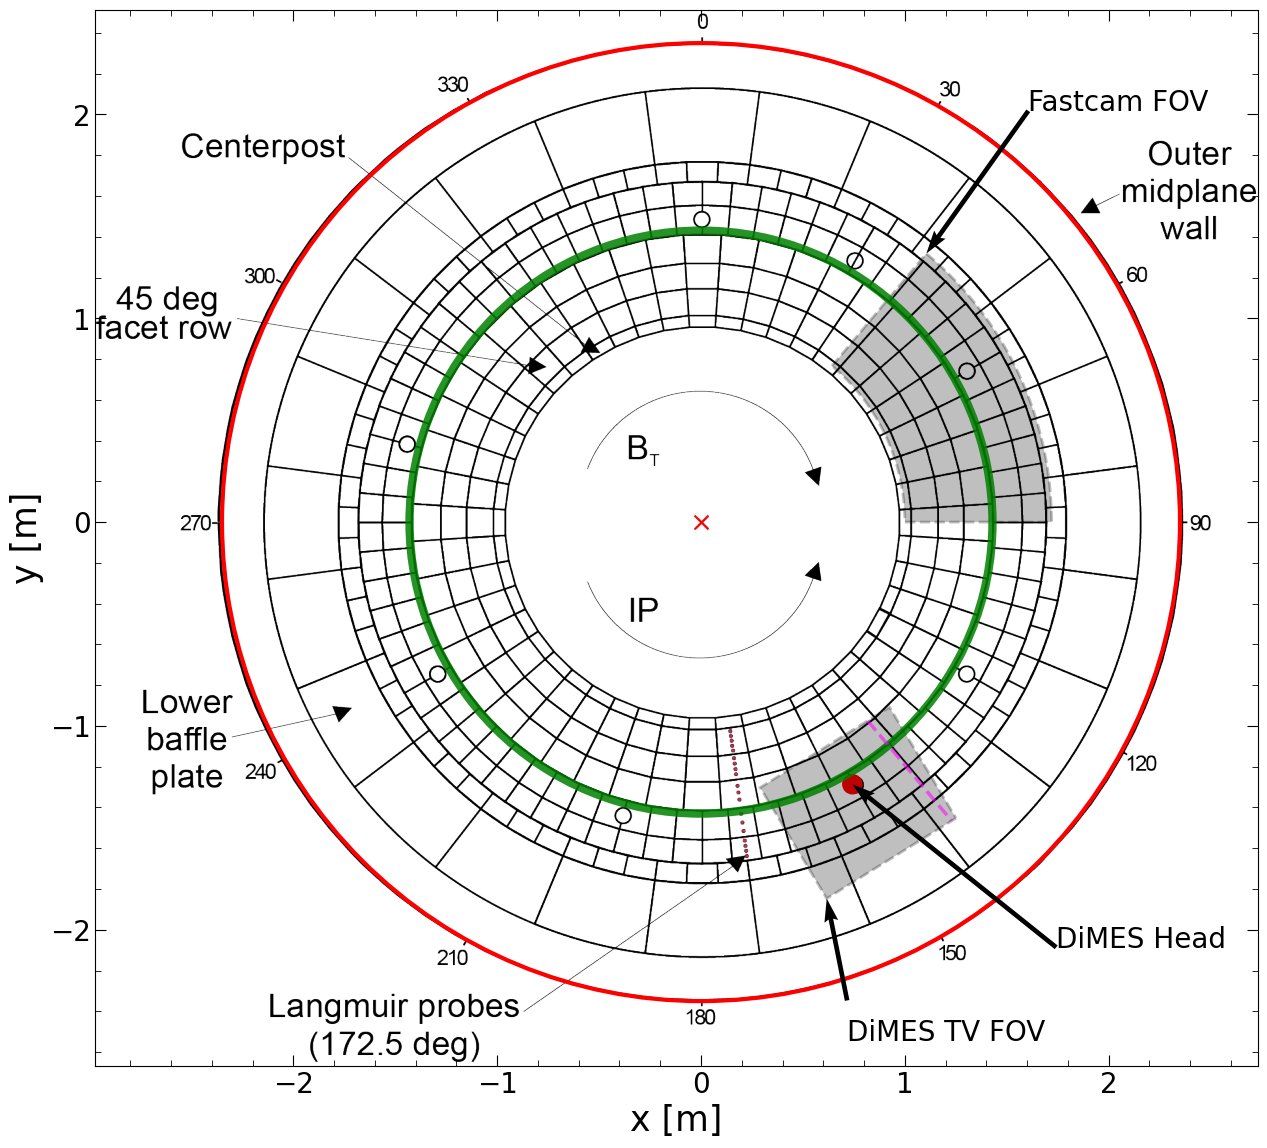

In [1]:
import floor 
import matplotlib.pyplot as plt
import numpy as np
import process 
import matplotlib.patches as patches

fig, ax = plt.subplots(1,figsize=(15,15))
fig, ax, loc = floor.show_diagnostics(fig, ax, ['dimes_tv','fastcam','dimes'])
# define radial slices that will be analyzed
fastcam = [45,65,80]
dimestv = [145,155]
slices = [fastcam, dimestv]
# define the width of the slices in the phi direction
R = [0,2.35]
        
# make a circle to show the position of the outer strike point
rvsod = patches.Circle((0,0),radius=1.43,fill=False,color='green',linewidth=6,alpha=0.85)
ax.add_patch(rvsod)

# show a chord at 145 deg
start, end = floor.chord(loc['dimes_tv'][0],140)
# show the chord on the dimes tv image
ax.plot([start[0],start[1]],[end[0],end[1]],'magenta',linestyle='--',linewidth=2.5,alpha=0.55)
# find the index of point closest to the start and end of the chord
start_img, end_img = floor.chord_img_pos(start,end,loc['dimes_tv'][0],loc['dimes_tv'][1])
print(start_img, end_img)



(50.0, 500.0)

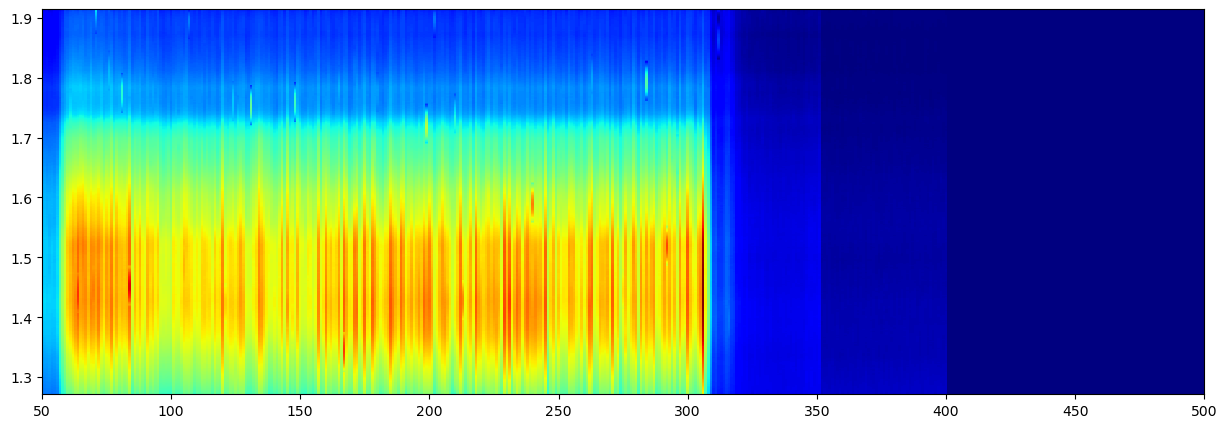

In [2]:
# get profile from dimes tv

import read

r_start, phi = process.cart_to_pol([start[0],end[0]])
r_end, phi = process.cart_to_pol([start[1],end[1]])
shot = 192972
out,n = read.dimes_img(f'/home/maana/mp_2022_34_53/munaretto/2022-11-21_Bortolon/{shot}_CII_1x1_1ms_low.tif')
profiles = []
t = []
for i in range(n):
    t.append(i+1)
    prof = process.dimes_line_profile(out,i,start_img,end_img)
    filtered, raw, normed = prof['filtered'], prof['raw'], prof['normalized']
    profiles.append(normed)
R = np.linspace(r_start,r_end,len(filtered))
profiles.append(normed)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(15,5))

ax.pcolormesh(t,R,np.transpose(np.array(profiles[:-1])),cmap='jet')
ax.set_xlim([50,500])

# Play one of the DiMES videos, and show the I,C coil plot next to it 

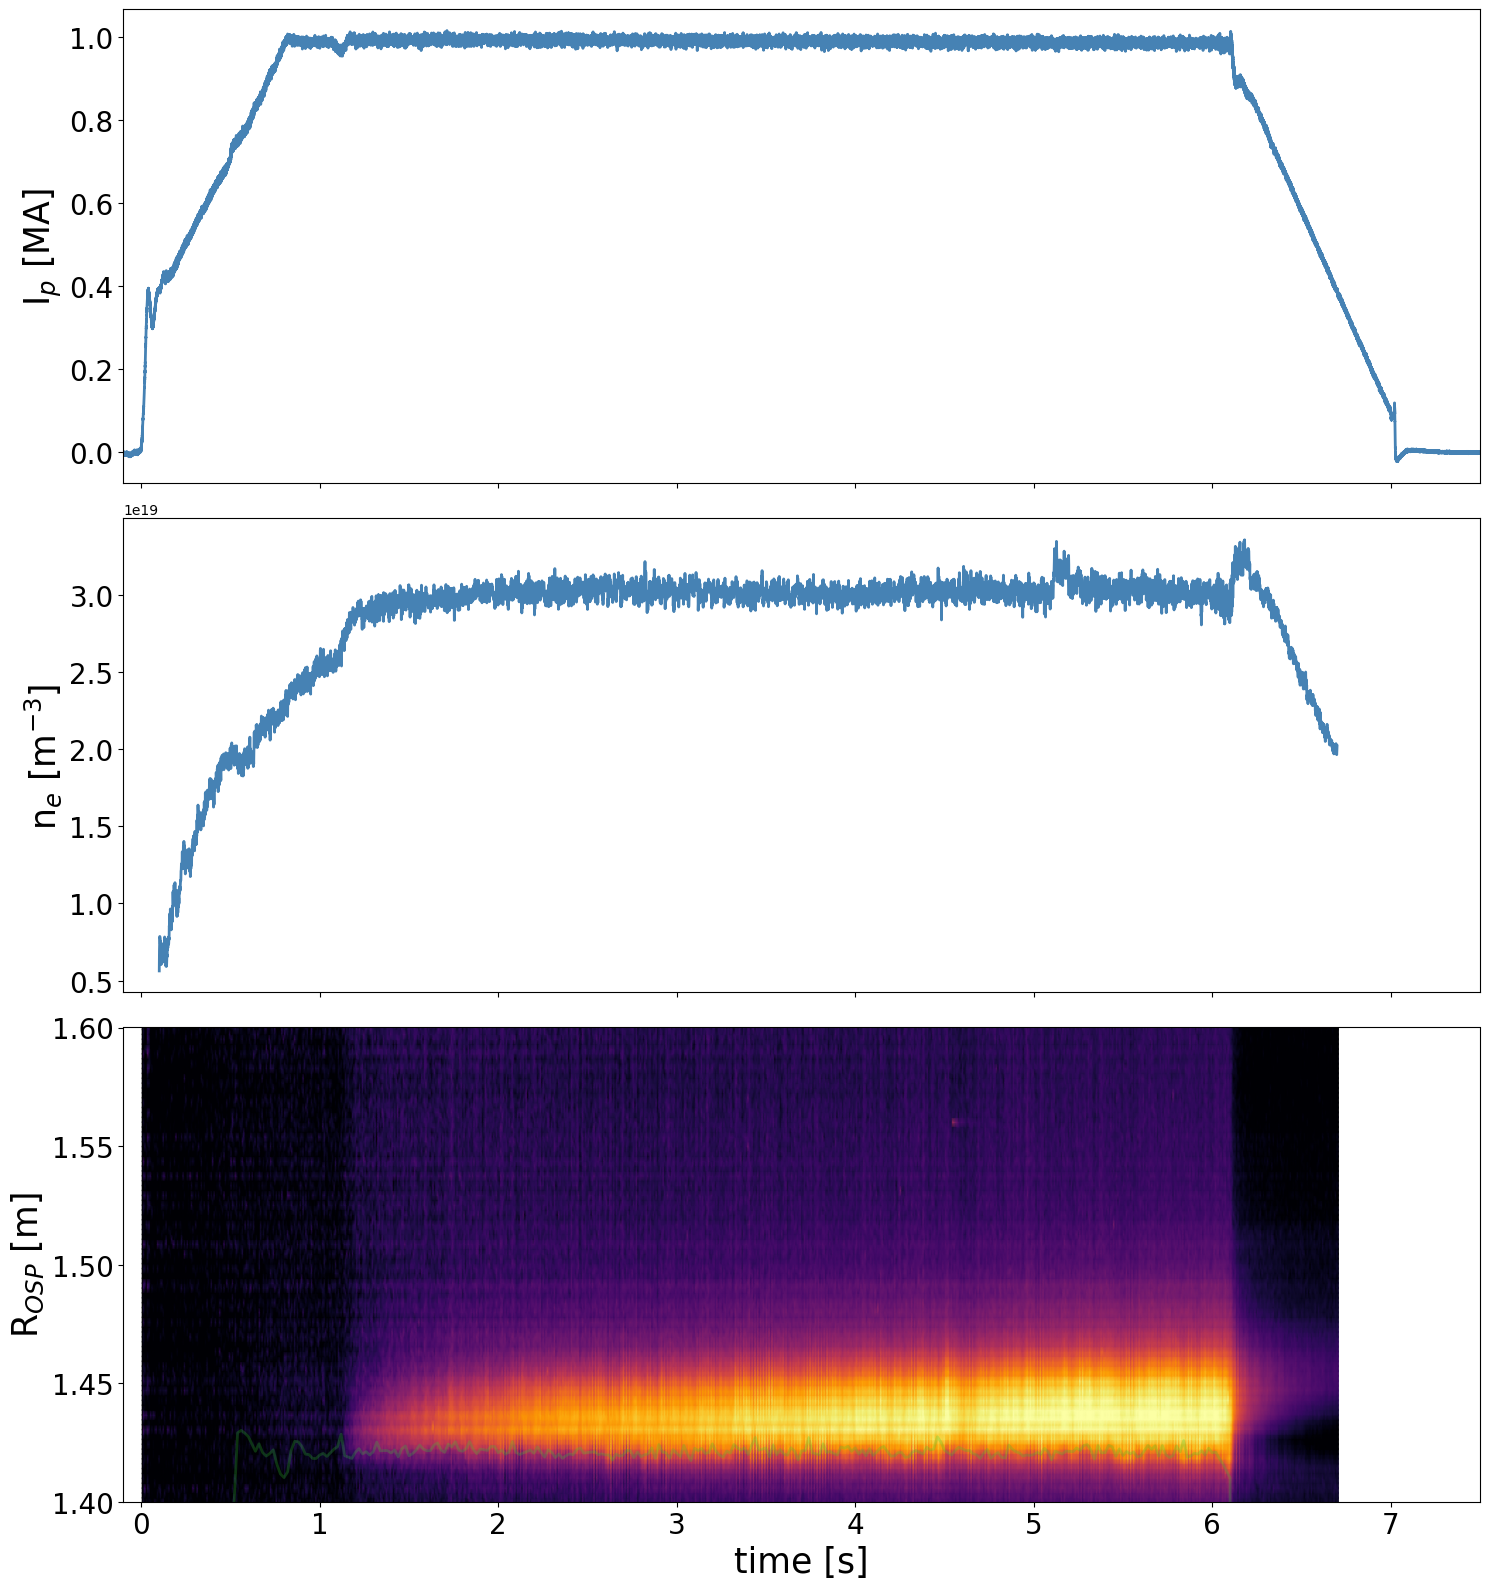

In [1]:
import matplotlib.pyplot as plt
import plot_tools as plot
import read
import numpy as np
import matplotlib.colors 

shot = 192966
fig, ax = plt.subplots(3,1,figsize=(15,16))
ip,t,units = read.one_d(shot,'ip')
plot.plot1d_ax(ax[0],t/1000,ip/1e6,'time [s]',r'I$_p$ [MA]',xlim=[-0.1,7.5])
n,t,units = read.one_d(shot,'density')
plot.plot1d_ax(ax[1],t/1000,n*1e6,'time [s]',r'n$_e$ [m$^{-3}$]',xlim=[-0.1,7.5])

x,t,pos,units = read.two_d(192963,'irtvq2dr2')
ax[2].pcolormesh(t/1000,pos/100,np.transpose(x),cmap='inferno',shading='gouraud',
                 vmin=1,vmax=95)
ax[2].set_ylim([1.4,1.6])
ax[2].set_xlim([0,7.5])

osp,t,units = read.one_d(shot,'rvsod')
plot.plot1d_ax(ax[2],t/1000,osp,'time [s]',r'R$_{OSP}$ [m]',xlim=[-0.1,7.5],ylim=[1.4,1.6],c='limegreen',alpha=0.25)

# remove xlables and xticklabels from all but bottom plot
for i in range(len(ax)-1):
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([])
    
    
# tight 
fig.tight_layout()

Blue line intersects clipped shape: True
Green line intersects clipped shape: False


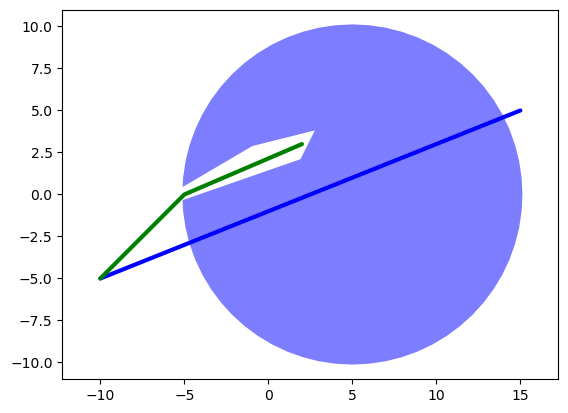

In [4]:
# https://stackoverflow.com/questions/6050392/determine-if-a-line-segment-intersects-a-polygon
# modified for python 3, incl. fixes
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry

circle = shapely.geometry.Point(5.0, 0.0).buffer(10.0)
clip_poly = shapely.geometry.Polygon([[-9.5, -2], [2, 2], [3, 4], [-1, 3]])
clipped_shape = circle.difference(clip_poly)

line = shapely.geometry.LineString([[-10, -5], [15, 5]])
line2 = shapely.geometry.LineString([[-10, -5], [-5, 0], [2, 3]])

print('Blue line intersects clipped shape:', line.intersects(clipped_shape))
print('Green line intersects clipped shape:', line2.intersects(clipped_shape))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(*np.array(line.coords.xy), color='blue', linewidth=3, solid_capstyle='round')
ax.plot(*np.array(line2.coords.xy), color='green', linewidth=3, solid_capstyle='round')
plt.fill(*np.array(clipped_shape.boundary.coords.xy), facecolor=(0.49,0.49,1), edgecolor=(0.49,0.49,1), linewidth=3)
ax.axis('equal')

plt.show()

In [5]:
line.intersection(clipped_shape).coords.xy

(array('d', [-4.586498440203165, 13.89330111917454]),
 array('d', [-2.8345993760812664, 4.557320447669816]))

In [3]:
loc['dimes_tv']

[[1.2513126515529454, -1.452450897466661],
 [1.2449043949458916, -1.4564344268323202],
 [1.2384961383388375, -1.4604179561979793],
 [1.2320878817317837, -1.4644014855636385],
 [1.22567962512473, -1.4683850149292976],
 [1.219271368517676, -1.4723685442949568],
 [1.2128631119106221, -1.476352073660616],
 [1.2064548553035683, -1.4803356030262753],
 [1.2000465986965145, -1.4843191323919345],
 [1.1936383420894605, -1.4883026617575936],
 [1.1872300854824067, -1.4922861911232528],
 [1.180821828875353, -1.496269720488912],
 [1.174413572268299, -1.500253249854571],
 [1.168005315661245, -1.5042367792202302],
 [1.1615970590541913, -1.5082203085858894],
 [1.1551888024471373, -1.5122038379515486],
 [1.1487805458400835, -1.5161873673172077],
 [1.1423722892330297, -1.5201708966828669],
 [1.1359640326259757, -1.524154426048526],
 [1.1295557760189219, -1.5281379554141852],
 [1.123147519411868, -1.5321214847798443],
 [1.1167392628048143, -1.5361050141455037],
 [1.1103310061977603, -1.5400885435111629],


In [4]:
profile.profile_line(

AttributeError: 'list' object has no attribute 'dtype'